# **Task 2**

## **Prediction using Unsupervised ML**


* In this task, from the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
### Workshop - 1: K- Means Clustering
* This notebook will walk through some of the basics of K-Means Clustering.


### GRIP THE SPARKS FOUNDATION ###
# Author: Muhammet Varlı

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# 1. Data Read

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
# Let's have an overview of the data set
df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [4]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# **2. Using the elbow method to determine the optimal number of clusters for k-means clustering**

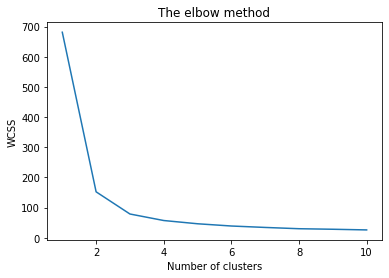

In [5]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

* From this we choose the number of clusters as **3**

In [10]:
!pip install yellowbrick
# Library download required for optimization

# **Optimizing the number of clusters**

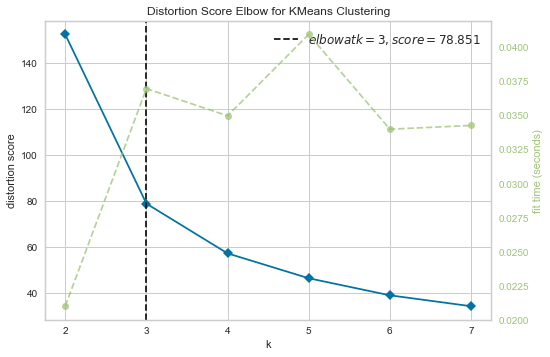

In [11]:
# K-means Model Tuning
# Deciding how many n_clusters will be, determining the optimum value.
from yellowbrick.cluster import KElbowVisualizer 
kmeans = KMeans() 
visualizer = KElbowVisualizer(kmeans, k=(2,8)) # Tries the value of k with values between 2-8.
visualizer.fit(x) 
visualizer.poof() 

* This method does not give direct results about the optimum value, but provides the user with a decision about which number of clusters has the lowest error when between a certain number of clusters.
* How many clusters the model will be divided into (how many segmentation it will undergo) should be determined with business information.

In [13]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# **3. 2D visualization of clustering**

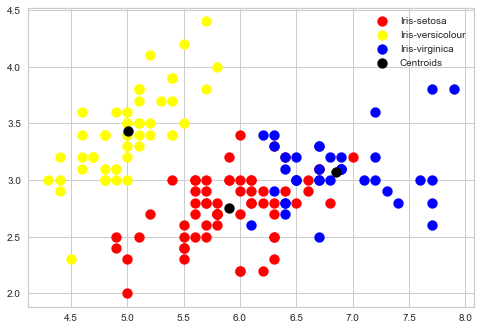

In [14]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [15]:
# Library for 3D visualization
from mpl_toolkits.mplot3d import Axes3D

In [33]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0) 
k_fit = kmeans.fit(x) 
centers = kmeans.cluster_centers_ # assigning cluster centers to a variable

# **4. 3D visualization of clustering**

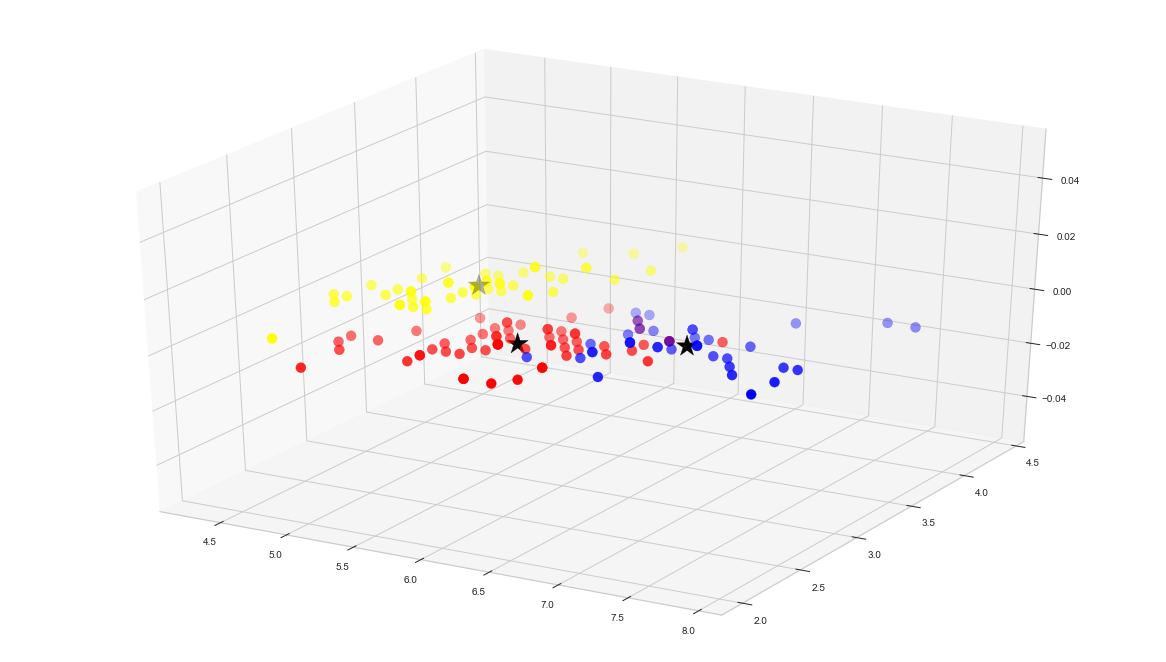

In [42]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Iris-versicolour')
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
ax.scatter(centers[:, 0], centers[:, 1], s = 500, c = 'black', label = 'Centroids',marker='*')